# Лабороторная работа №4

**Выполнена студентом группы А-05-20 Ходосевичем Леонидом**  
**Вариант 25**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 4.1  

In [230]:
Years = np.linspace(1950,2020,8)
Austria = np.asarray([6.8, 7, 7.4, 7.6, 8, 8, 8.4, 9])
Length = len(Years)
print(Years)
print(Austria)

[1950. 1960. 1970. 1980. 1990. 2000. 2010. 2020.]
[6.8 7.  7.4 7.6 8.  8.  8.4 9. ]


***Поздазача 1***  
В таблице  4.1  приведены данные о численности населения некоторых крупнейших стран мира по годам с 1950 -2000 г.г.  
Заполнить последние два столбца таблицы (взять сведения из интернета).   
На основе этих данных для конкретного варианта построить наилучший многочлен  по МНК.   
Найти численность  населения страны  в 2019 году  и сравнить полученное значение  с актуальным значением  (взять из интернета).  

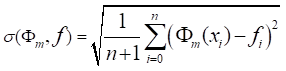
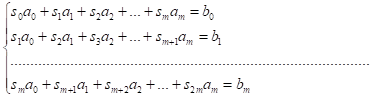
, где  
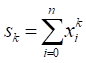
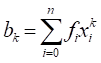

Задаем   
1)функцию нахождения разложения в полином из решения нормальной системы   
2)функцию нахождения значения полинома в точке  
3)среднеквадратичное отклонение  

In [231]:
def Least_squares(x_, f_, n):
    s = np.zeros((2*n,1))
    b_ = np.zeros((n,1))
    for i in range(2*n):
        s[i] = (x_**i).sum()
        
    for i in range(n):
        b_[i] = (f_*x_**i).sum()
        
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = s[j+i]
            
    a_ = np.linalg.solve(A,b_)
    return a_

def Polynom_in_dot(a,x):
    res = 0
    for i in range(a.shape[0]):
        res = res + x**i * a[i]
    return res

def Count_MSE(polynom_x):
    return np.sqrt(((polynom_x - Austria)**2).sum() / (Length+1))

Решаем, находим полином с наименьшим СКО среди первых 10

In [232]:
min_mse = 10000000
index_min_mse = 0
for i in range(10):
    a_temp = Least_squares(Years,Austria,i+1)
    buf_mse = Count_MSE(Polynom_in_dot(a_temp, Years))
    if buf_mse < min_mse:
        min_mse = buf_mse
        index_min_mse = i+1
print(min_mse)
print(index_min_mse)

0.052964652367063
8


**подзадача 2**  
Решить ту же  задачу на основе интерполяционного многочлена.  
То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г.   
Вычислить значение  для 2019 года и сравнить с актуальными данными.  Составить отчет по задаче.  
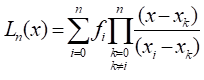

Задаем функцию нахождения значения многочлена Лагранжа в точке

In [233]:
def Lagrange(x_, x, y):
    res = 0
    for i in range(len(y)): # i проходит по точкам
        temp = 1
        for j in range(len(y)): # j проходит для произведения
            if i!=j:
                temp *=  (x_ - x[j]) / (x[i] - x[j])
        res += y[i] * temp        
    return res

Строим графики получившихся многочленов

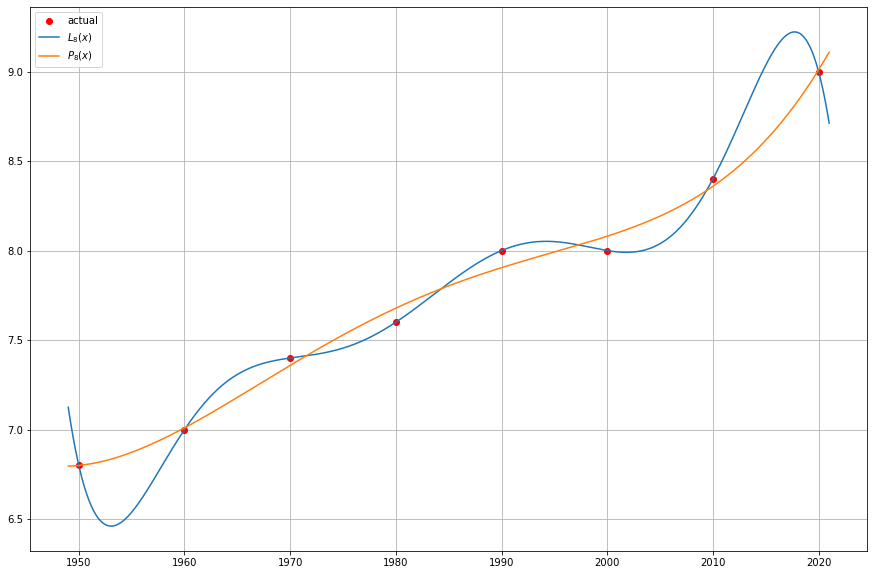

In [234]:
x_range = np.linspace(1949,2021,1000)

fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(Years,Austria,ls = 'None',marker = 'o',color = 'r',label = 'actual')
ax.plot(x_range,Lagrange(x_range, Years, Austria), label = '$L_8(x)$')
ax.plot(x_range,Polynom_in_dot(Least_squares(Years, Austria, 8), x_range), label = '$P_8(x)$')
ax.legend()
ax.grid()

Сравниваем значения при этих двух многочленах с реальными

In [7]:
print('Polynom:',Polynom_in_dot(Least_squares(Years, Austria, 8), 2019)[0])
print('Lagrange:',Lagrange(2019,Years,Austria))
print('Actual:', 8894380 / 1000000)

Polynom: 8.91737033042591
Lagrange: 9.159063626250003
Actual: 8.89438


Как можно увидеть, разложение по МНК ближе к реальным данным. Вероятно это изза того что данные о численности населения - приближенные и в данном типе задач приближения функция МНК показывает себя очень хорошо.

# Задача 2

**Подзадача 1**
Приблизить функцию 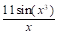 методом интерполяции, используя многочлен Лагранжа.   
Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке [1,2.75] не превышала заданной величины   
Построить графики многочленов и графики погрешностей .

Задаем отрезок на котором будем интерполировать

In [238]:
a = 1
b = 2.75

Задаем функции для подсчета значения функции и погрешности интерполяции

In [239]:
def Func(x):
    return 11*np.sin(x**3) / x
def Polynomial_error(P_x, x):
    return abs(Func(x) - P_x)

Использовать в данном пункте будем многочлен Лагранжа, функцию для которого мы определили в прошлом пункте.  
Здесь определяем оптимальное количество узлов интерполяции

In [240]:
temp_x_range = np.linspace(a,b, 3)
temp_y = np.asarray([Func(i) for i in temp_x_range])
x_range_2 = np.linspace(a,b, 5000)
n = 3
while (Polynomial_error(Lagrange(x_range_2, temp_x_range, temp_y), x_range_2).max()  > 0.001):
    n+=1
    temp_x_range = np.linspace(a,b, n)
    temp_y = np.asarray([Func(i) for i in temp_x_range])
print(n)

33


Тут строим график погрешности для полученного количества узлов

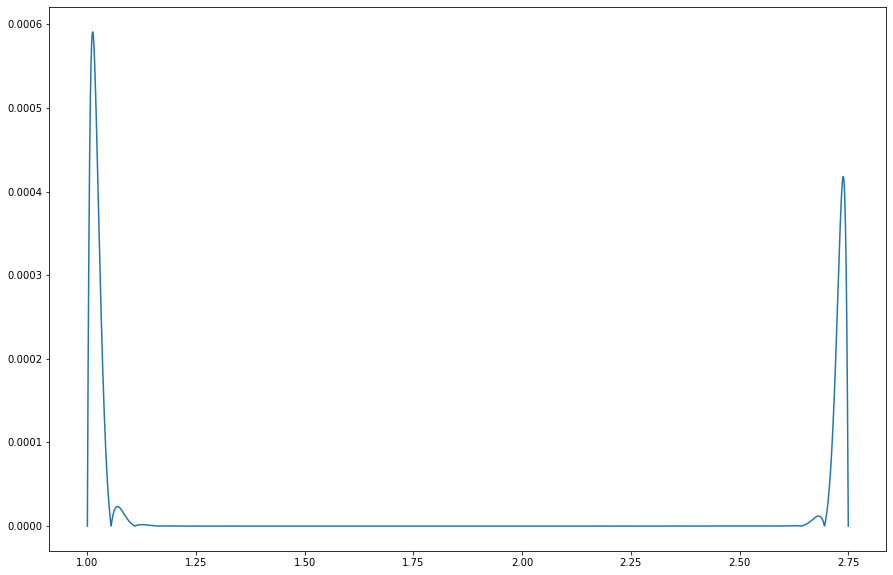

In [241]:
x = np.linspace(a,b, 33)
y = np.asarray([Func(i) for i in x])
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(x_range_2,Polynomial_error(Lagrange(x_range_2, x, y), x_range_2))

Строим график получившейся функции

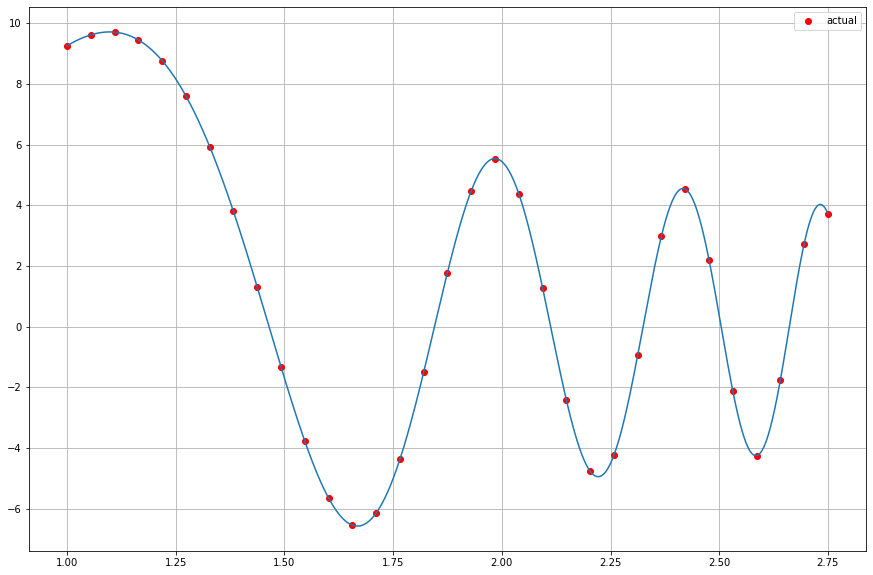

In [242]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(x,y,ls = 'None',marker = 'o',color = 'r',label = 'actual')
ax.plot(x_range_2,Lagrange(x_range_2, x, y))
ax.legend()
ax.grid()

**Подзадача 2**  
Приблизить функцию  методом интерполяции, указанным в  индивидуальном варианте.  
Сравнить полученные результаты.   
Фундаментальный сплайн (кубический сплайн деффекта 1 с доп.условием - $s_0 = y'_0$ и  $s_n = y'_n$  


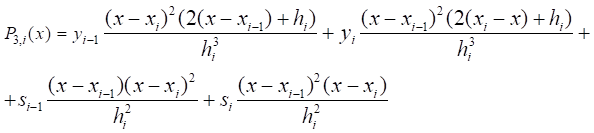

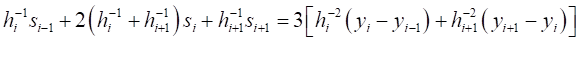 , где $ i = 1,2,...n-1 $  
Это условие дает нам матрицу из n-1 уравнений и имеет n+1 неизвестных  
дополнительные уравнения мы получаем из условия  $s_0 = y'_0$ и  $s_n = y'_n$  

Объявляем функцию для производной

In [247]:
def Func_deviarate(x):
    return 33*x*np.cos(x**3) - (11*np.sin(x**3))/x**2

Объявляенм функции для нахождения наклонов сплайна в каждом из отрезков разбиения  
Функцию нахождения значения в точке

In [248]:
def Create_spline_slopes(x_,y_):
    n = len(x_)
    h = np.asarray([x_[i] - x_[i-1] for i in range(1,n,1)])
    S_ = np.zeros((n,n))
    c_ =  np.zeros((n,1))
    for i in range(1,n-1,1):
        S_[i,i-1] = h[i-1]**(-1)
        S_[i,i] = 2*(h[i-1]**(-1) + h[i]**(-1))
        S_[i,i+1] = h[i]**(-1)
        S_[0, 0] = 1
        S_[n-1, n-1] = 1
        
        c_[i] = 3*(h[i-1]**(-2)*(y_[i]-y_[i-1]) + h[i]**(-2)*(y_[i+1]-y_[i]))
        c_[0] = Func_deviarate(x_[0])
        c_[n-1] = Func_deviarate(x_[n-1])
    
    spline_slopes = np.linalg.solve(S_,c_)
    return spline_slopes

def Spline(slopes,x,y,arg):
    #определяем какие переменные использовать для данного arg
    n = len(x)
    i = 1
    for k in range(n):
        if ((arg > x[k])):
            i+=1
    i-=1
    #print(i)
    h = np.asarray([x[k] - x[k-1] for k in range(n)])
    #print(h)
    res = y[i - 1] * ((arg - x[i])**2)*(2*(arg - x[i - 1]) + h[i]) / h[i]**3 
    res += y[i] * ((arg - x[i-1])**2)*(2*(x[i] - arg) + h[i]) / h[i]**3 
    res += slopes[i-1] * (arg - x[i-1])*(arg - x[i])**2 / h[i]**2 
    res += slopes[i] * (arg - x[i])*(arg - x[i-1])**2 / h[i]**2 
    return res

Определяем оптимальный порядок разбиения отрезка

In [249]:
max_error = 0.002
x_range_3 = np.linspace(a,b,5000)
n = 3
while (max_error > 0.001):
    #print(n, max_error)
    n+=1
    temp_x_range = np.linspace(a,b, n)
    temp_y = np.asarray([Func(i) for i in temp_x_range])
    temp_spline = Create_spline_slopes(temp_x_range,temp_y)
    max_error = 0

    for dot in x_range_3:
        t = Polynomial_error(Spline(temp_spline,temp_x_range,temp_y,dot),dot)
        if t > max_error:
            max_error = t
print(n)

73


Строим график погрешности при n = 73

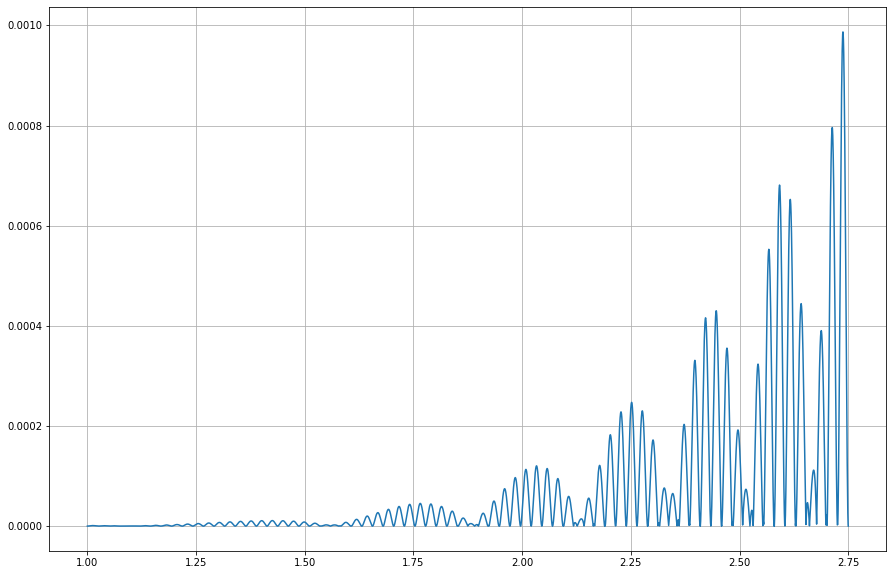

In [250]:
n = 73
x = np.linspace(a,b, n)
y = Func(x)
slopes = Create_spline_slopes(x, Func(x))
x_range_3 = np.linspace(a,b,5000)
plotting_buf = []

fig, ax = plt.subplots(1,1,figsize = (15,10))
for dot in x_range_3:
    plotting_buf.append(Polynomial_error(Spline(slopes,x,y,dot),dot))
ax.plot(x_range_3,plotting_buf)
ax.grid()

Строим график функции, интерполированной с помощью сплайна

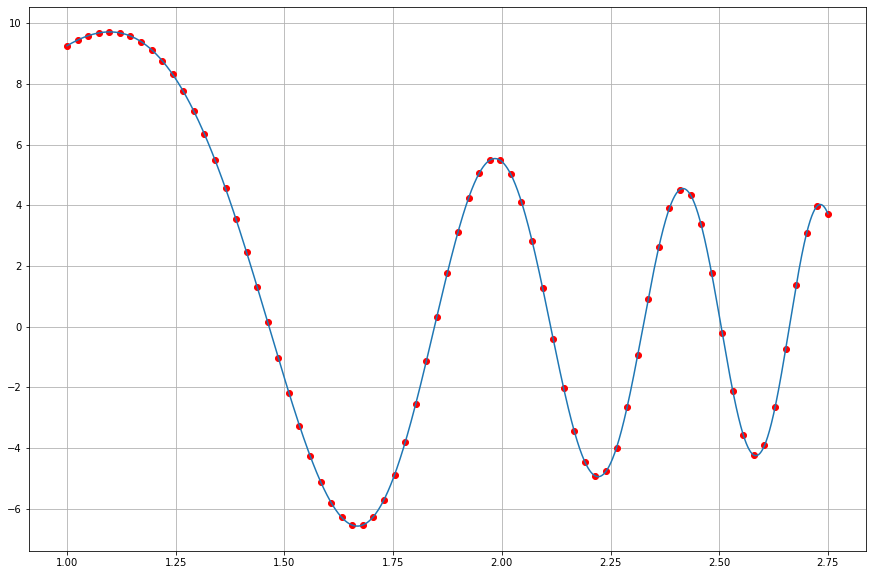

In [251]:
n = 73
x = np.linspace(a,b, n)
y = Func(x)
slopes = Create_spline_slopes(x, Func(x))
x_range_3 = np.linspace(a,b,5000)
plotting_buf = []
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(x,y,ls = 'None',marker = 'o',color = 'r',label = 'actual')
for dot in x_range_3:
    plotting_buf.append(Spline(slopes,x,y,dot))
ax.plot(x_range_3,plotting_buf)
ax.grid()

Строим графики для:  
1) Самой функции   
2) Многочлена Лагранжа  
3) Сплайна  

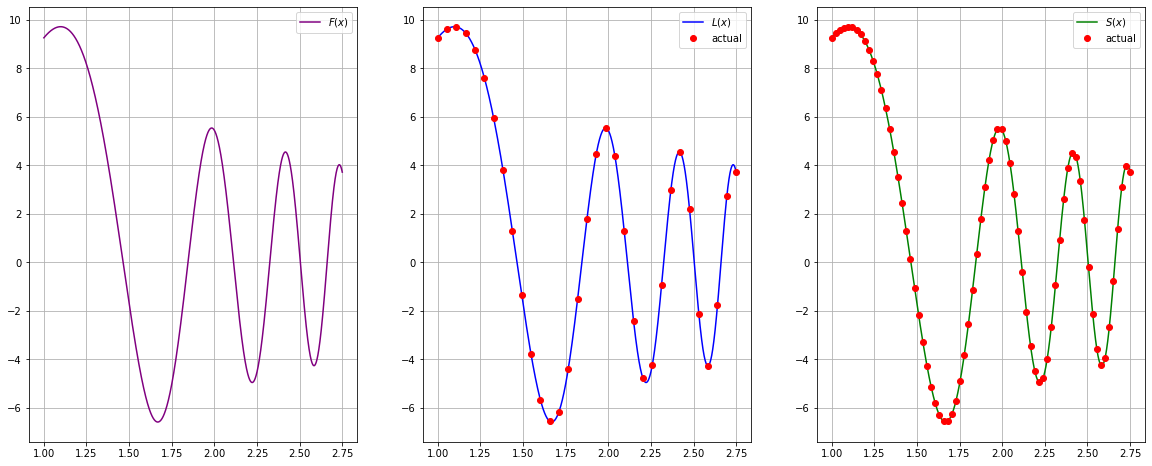

In [254]:
fig, ax = plt.subplots(1,3,figsize = (20,8))

#строим для сплайна
n_1 = 73
x = np.linspace(a,b, n)
y = Func(x)
slopes = Create_spline_slopes(x, Func(x))
x_range_4 = np.linspace(a,b,5000)
plotting_buf = []

for dot in x_range_4:
    plotting_buf.append(Spline(slopes,x,y,dot))
ax[2].plot(x_range_4,plotting_buf,label = '$S(x)$',c = 'g')
ax[2].plot(x,y,ls = 'None',marker = 'o',color = 'r',label = 'actual')
#строим лагранжа
x = np.linspace(a,b, 33)
y = np.asarray([Func(i) for i in x])
ax[1].plot(x_range_4,Lagrange(x_range_4, x, y),label = '$L(x)$',c = 'b')
ax[1].plot(x,y,ls = 'None',marker = 'o',color = 'r',label = 'actual')
#строим функции
ax[0].plot(x_range_4,Func(x_range_4),label = '$F(x)$',c = 'purple')


for i in range(3):
    ax[i].legend()
    ax[i].grid()

Как видим, для сплайна в данном случае нужно взять гораздо большее разбиение отрезка.  
Оба метода неплохо интерполируют заданную функцию  


# Задание 3
Задана функция  , определенная на отрезке [-1;1].  
Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью   
и произвести экономизацию полученного степенного ряда.

$e^{x} - 1 = \sum_{k=0}^{n}\frac{x^k}{k!} - 1$

Задаем точность и отрезок, на котором функция раскладывается в ряд

In [224]:
eps = 10**(-8)
a = -1
b = 1
x_range_5 = np.linspace(a,b,1000)

Задаем функции 
1) n-го коэфициента $c_n$ при $x^{n}$  
2) Суммы в точке x для заданного массива элементов c  
3) Функции F(x)

In [225]:
def c_n(n):
    return 1 / np.math.factorial(n)

# сумма первых n членов
def S_n(x, c):
    res = 0
    n = len(c)
    for i in range(n):
        res += c[i]*x**i
    return res - 1
        
def Func(x):
    return np.e**x - 1 

Считаем при каком n достигается точность 

In [226]:
n = 2
c = np.asarray([c_n(i) for i in range(0,n,1)])
taylor = S_n(x_range_5,c).max()
f = Func(x_range_5).max()
while abs(f - taylor) > eps:
    n += 1
    c = np.asarray([c_n(i) for i in range(0,n,1)])
    taylor = S_n(x_range_5,c).max()
print(n)

12


Задаем функции экономизации для $x_{11} , x_{10} , x_{9}$

In [227]:
def eco_11(x):
    return (1/1024)*(2816*x**9 - 2816*x**7 + 1232*x**5 - 220*x**3 + 11*x )

def eco_10(x):
    return (1/512)*(1280*x**8 - 1120*x**6 + 400*x**4 - 50*x**2 + 1)

def eco_9(x):
    return (1/256)*(573*x**7 - 432*x**5 + 120*x**3 - 9*x)

Считаем погрешность при экономизации исходного ряда, записываем результат в виде:  
<До какого элемента $x_n$ экономизировали> : <Меньше ли погрешность нового ряда заданной(true / false)>  
Далее строим графики погрешностей при экономизации

11  :  True
10  :  True
9  :  False


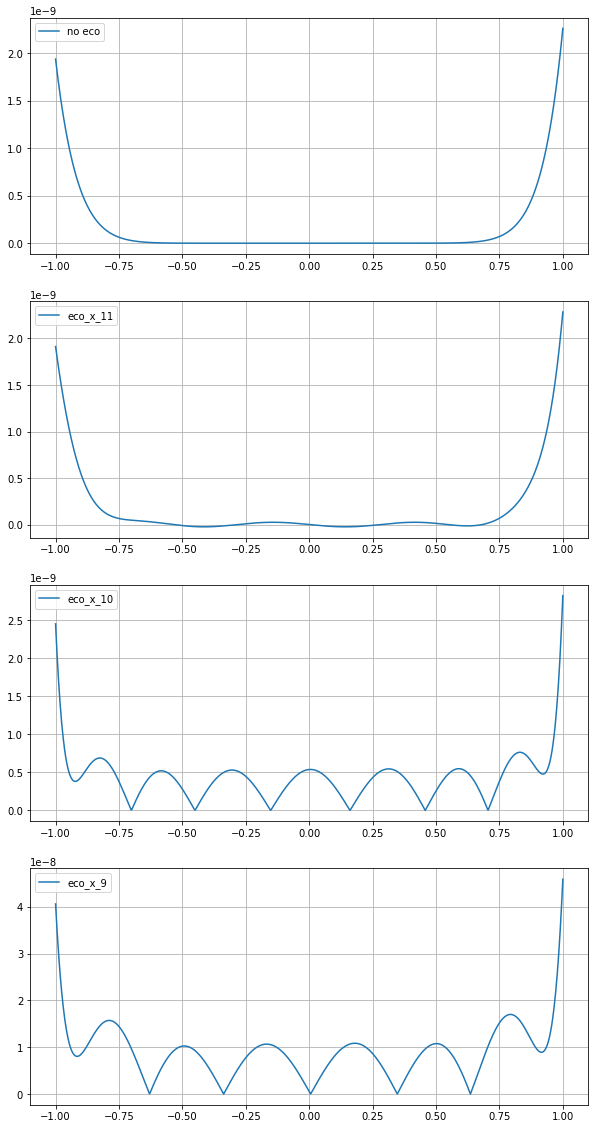

In [228]:
fig,ax  = plt.subplots(4,1,figsize=(10,20))

# 12 членов
c = np.asarray([c_n(i) for i in range(0,n,1)])
ax[0].plot(x_range_5,(Func(x_range_5) - S_n(x_range_5,c)),label = 'no eco')

# 11 членов x^11 --> eco_11 --> S~_10
c = np.asarray([c_n(i) for i in range(0,n-1,1)])
print(n-1,' : ',np.abs((Func(x_range_5) - S_n(x_range_5,c) - c_n(11) * eco_11(x_range_5))).max() < eps)
ax[1].plot(x_range_5,((Func(x_range_5) - S_n(x_range_5,c) - c_n(11) * eco_11(x_range_5)))
          ,label = 'eco_x_11')

# 10 членов x^10 --> eco_10 --> S~_9
c = np.asarray([c_n(i) for i in range(0,n-2,1)])
print(n-2,' : ',np.abs((Func(x_range_5) - S_n(x_range_5,c) - c_n(10) * eco_10(x_range_5)- c_n(11) * eco_11(x_range_5) )).max() < eps)
ax[2].plot(x_range_5,np.abs((Func(x_range_5) - S_n(x_range_5,c) - c_n(10) * eco_10(x_range_5) - c_n(11) * eco_11(x_range_5)))
          ,label = 'eco_x_10'
          )

# 9 членов x^9 --> eco_9 --> S~_8
c = np.asarray([c_n(i) for i in range(0,n-3,1)])
print(n-3,' : ',np.abs((Func(x_range_5) - S_n(x_range_5,c) - c_n(9) * eco_9(x_range_5) - c_n(10) * eco_10(x_range_5) - c_n(11) * eco_11(x_range_5) )).max() < eps)
ax[3].plot(x_range_5,
           np.abs((Func(x_range_5) - S_n(x_range_5,c) - c_n(9) * eco_9(x_range_5) - c_n(10) * eco_10(x_range_5) - c_n(11) * eco_11(x_range_5)))
          ,label = 'eco_x_9')

for i in range(4):
    ax[i].grid()
    ax[i].legend()